# Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/loan_approval_dataset.csv')

# Loading the dataset into Pandas DataFrame

In [ ]:
df = pd.DataFrame(dataset)

# Accessing the first five rows of the dataset

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# The dimensions of the dataset are

In [ ]:
df.shape

(4269, 13)

#Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Renaming the columns

In [ ]:
df.columns = df.columns.str.strip()

# Optional: Rename columns to more convenient names
df = df.rename(columns={
    'no_of_dependents': 'dependents',
    'education': 'education',
    'self_employed': 'self_employed',
    'income_annum': 'income_annual',
    'loan_amount': 'loan_amount',
    'loan_term': 'loan_term',
    'cibil_score': 'cibil_score',
    'residential_assets_value': 'residential_value',
    'commercial_assets_value': 'commercial_value',
    'luxury_assets_value': 'luxury_value',
    'bank_asset_value': 'bank_value',
    'loan_status': 'loan_status'
})

# Accessing the columns of the dataset

In [ ]:
df.columns

Index(['loan_id', 'dependents', 'education', 'self_employed', 'income_annual',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_value',
       'commercial_value', 'luxury_value', 'bank_value', 'loan_status'],
      dtype='object')

#**DATA CLEANING**

# Finding if there are any null values in the dataset


In [ ]:
df.isnull().sum()

,0
loan_id,0
dependents,0
education,0
self_employed,0
income_annual,0
loan_amount,0
loan_term,0
cibil_score,0
residential_value,0
commercial_value,0


# Dropping duplicates, if present

In [ ]:
df = df.drop_duplicates()
df

,loan_id,dependents,education,self_employed,income_annual,loan_amount,loan_term,cibil_score,residential_value,commercial_value,luxury_value,bank_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Statistical description of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annual,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


#**EXPLORATORY DATA ANALYSIS**

# Display the count of Loan Status

<ipython-input-12-60b07106d5e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status', data=df, palette='Set2')


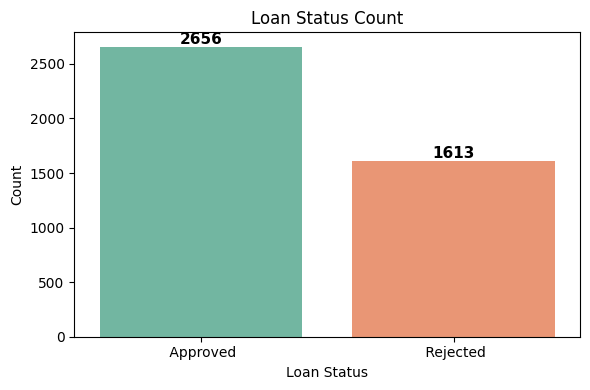

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'loan_status' is cleaned and in the DataFrame
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='loan_status', data=df, palette='Set2')

# Annotate bars with count values
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **HISTOGRAM** for distribution of Annual Income and Loan Amount

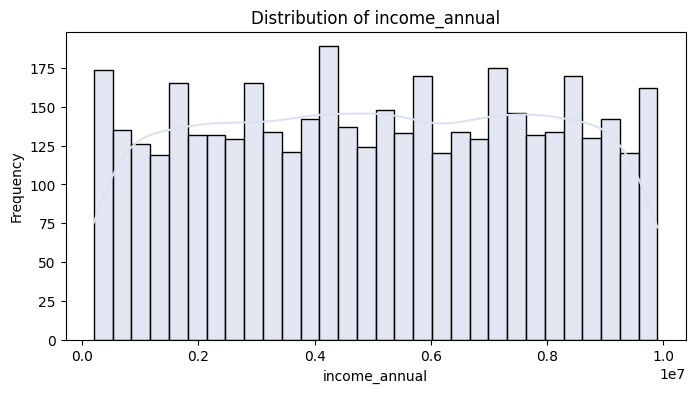

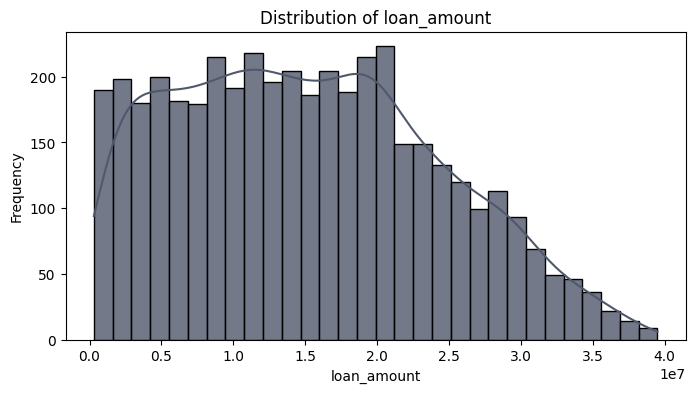

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

num_cols = ['income_annual', 'loan_amount']

color_map = {
    'income_annum': '#DCE2F0',
    'loan_amount': '#50586C'
}

# Histogram Plot with Custom Bar Colors
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(
            df[col],
            kde=True,
            bins=30,
            color=color_map.get(col, '#DCE2F0'),
            edgecolor='black',
            alpha=0.8
        )
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Comparison of Residential value, Commercial value, Luxury value and Bank value across Dependents through **BOX PLOT**

['loan_id', 'dependents', 'education', 'self_employed', 'income_annual', 'loan_amount', 'loan_term', 'cibil_score', 'residential_value', 'commercial_value', 'luxury_value', 'bank_value', 'loan_status']


<ipython-input-14-224a9993e9c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-14-224a9993e9c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


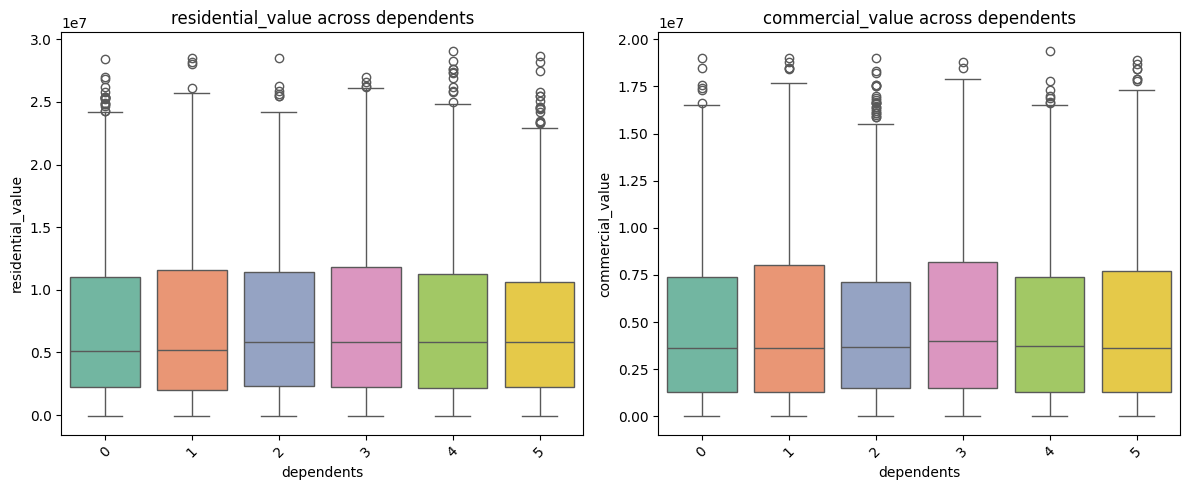

<ipython-input-14-224a9993e9c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-14-224a9993e9c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


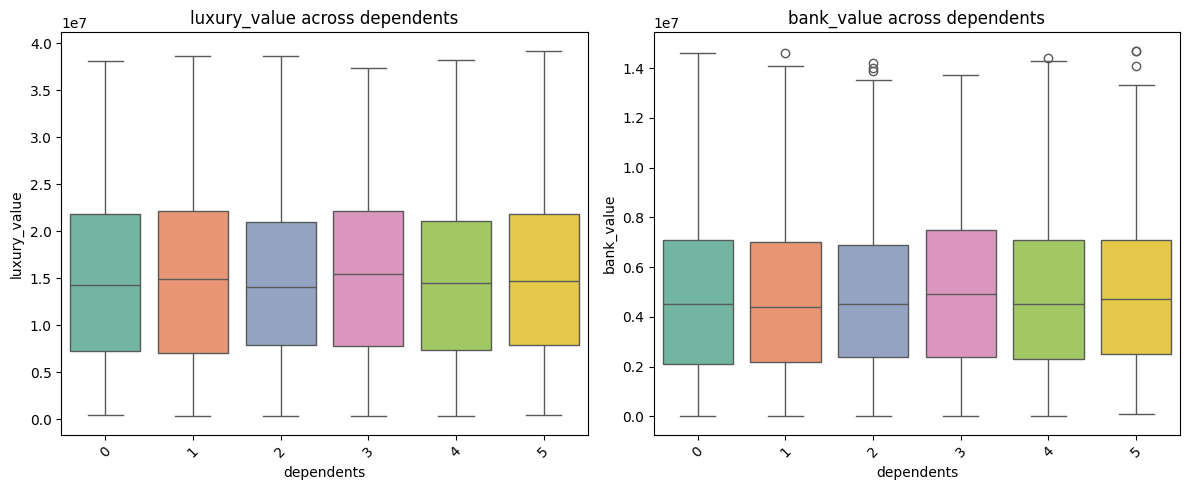

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.columns.tolist())  # Optional check

num_cols = ['residential_value', 'commercial_value', 'luxury_value', 'bank_value']
cat_cols = ['dependents']

for cat in cat_cols:
    for i in range(0, len(num_cols), 2):
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        for j in range(2):
            if i + j < len(num_cols):
                sns.boxplot(
                    data=df,
                    x=cat,
                    y=num_cols[i + j],
                    palette='Set2',
                    ax=axes[j]
                )
                axes[j].set_title(f'{num_cols[i + j]} across {cat}')
                axes[j].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()


# **CORRELATION HEATMAP** of numeric variables

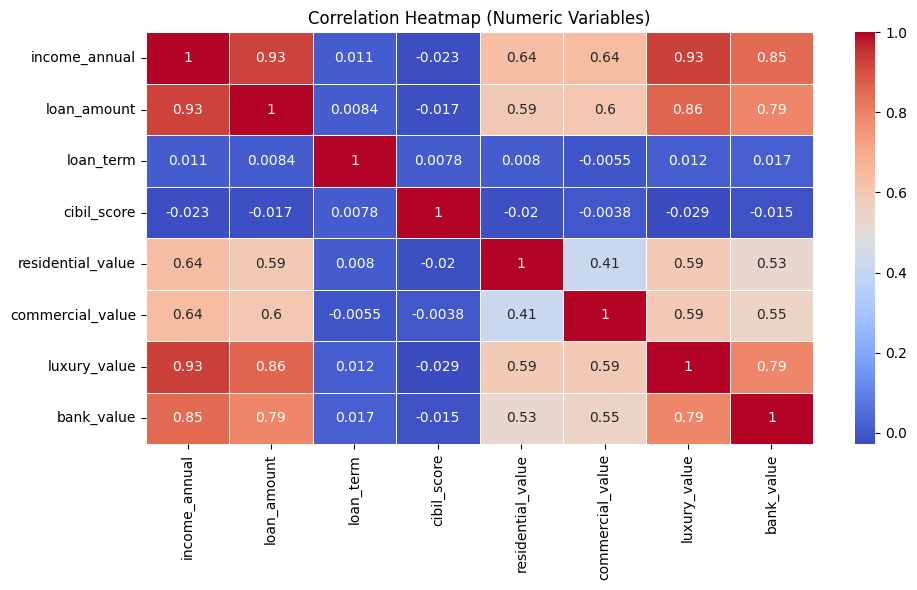

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Define variable groups
num_cols = [
    'income_annual', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_value', 'commercial_value',
    'luxury_value', 'bank_value'
]

cat_cols = ['dependents', 'education', 'self_employed', 'loan_status']

# Correlation Heatmap (Numeric-Numeric relationship)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.tight_layout()
plt.show()



# Loan Status education-wise through **BOXPLOT** split by Employment

Text(0.5, 0.98, 'Loan Amount by Education, Loan Status (Split by Employment)')

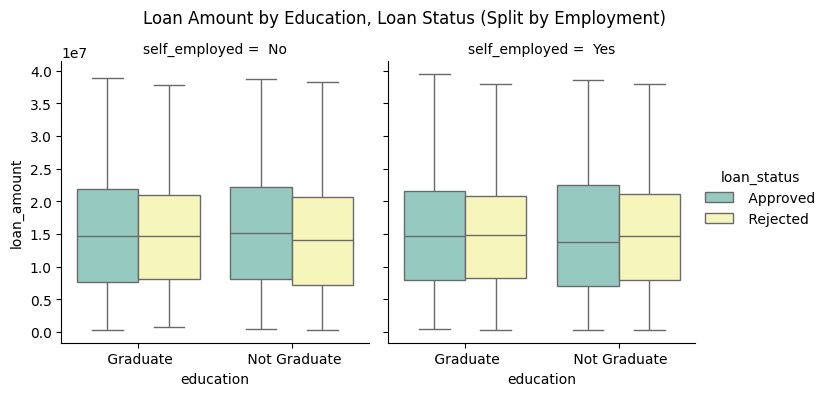

In [ ]:
g = sns.catplot(
    data=df,
    x='education',
    y='loan_amount',
    hue='loan_status',
    kind='box',
    col='self_employed',  # 3rd dimension
    palette='Set3',
    height=4,
    aspect=0.9
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Loan Amount by Education, Loan Status (Split by Employment)')

# **WATERFALL CHART** of Loan Eligibility

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

total = len(df)
eligible = df[df['cibil_score'] >= 750].shape[0]
approved = df[df['loan_status'].str.strip().str.lower() == 'approved'].shape[0]

fig = go.Figure(go.Waterfall(
    name="Loan Funnel",
    orientation="v",
    measure=["absolute", "relative", "relative"],  # first absolute, then drop-offs
    x=["Total Applicants", "Eligible (CIBIL ≥ 750)", "Approved"],
    textposition="outside",
    text=[f"{total}", f"-{total - eligible}", f"-{eligible - approved}"],
    y=[total, eligible - total, approved - eligible],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
    decreasing={"marker": {"color": "#EF553B"}},   # Red for drops
    increasing={"marker": {"color": "#00CC96"}},   # Green for gains
    totals={"marker": {"color": "#636EFA"}}        # Blue for totals
))

fig.update_layout(
    title="💧 Loan Application Waterfall Chart",
    title_font_size=22,
    waterfallgap=0.4,
    xaxis_title="Application Stage",
    yaxis_title="Applicant Count",
    plot_bgcolor='rgba(255,255,255,0.97)',
    paper_bgcolor='rgba(255,255,255,0.97)',
    font=dict(size=14),
    showlegend=False
)

fig.show()

# Comparision of Loan Metrics through **BULLET CHART**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['total_assets'] = df['residential_value'] + df['commercial_value'] + df['luxury_value'] + df['bank_value']
df['cibil_target'] = 750

metrics = df[['loan_amount', 'income_annual', 'cibil_score', 'cibil_target', 'bank_value', 'total_assets']].mean()

fig = go.Figure()

# Bullet 1: Loan Amount vs Income
fig.add_trace(go.Indicator(
    mode="number+gauge+delta",
    value=metrics['loan_amount'],
    delta={'reference': metrics['income_annual'], 'position': "right"},
    domain={'x': [0.1, 1], 'y': [0.7, 1]},
    title={'text': ""},
    gauge={
        'shape': "bullet",
        'axis': {'range': [None, metrics['income_annual'] * 1.2]},
        'threshold': {'line': {'color': "red", 'width': 2}, 'value': metrics['income_annual']},
        'bar': {'color': "green"},
        'steps': [
            {'range': [0, metrics['income_annual'] * 0.6], 'color': "lightgray"},
            {'range': [metrics['income_annual'] * 0.6, metrics['income_annual']], 'color': "gray"},
        ]
    }
))

# Bullet 2: CIBIL Score
fig.add_trace(go.Indicator(
    mode="number+gauge+delta",
    value=metrics['cibil_score'],
    delta={'reference': 750, 'position': "right"},
    domain={'x': [0.1, 1], 'y': [0.4, 0.7]},
    title={'text': ""},
    gauge={
        'shape': "bullet",
        'axis': {'range': [300, 900]},
        'threshold': {'line': {'color': "red", 'width': 2}, 'value': 750},
        'bar': {'color': "orange"},
        'steps': [
            {'range': [300, 600], 'color': "lightgray"},
            {'range': [600, 750], 'color': "gray"},
        ]
    }
))

# Bullet 3: Bank Assets vs Total
fig.add_trace(go.Indicator(
    mode="number+gauge+delta",
    value=metrics['bank_value'],
    delta={'reference': metrics['total_assets'], 'position': "right"},
    domain={'x': [0.1, 1], 'y': [0.1, 0.4]},
    title={'text': ""},
    gauge={
        'shape': "bullet",
        'axis': {'range': [None, metrics['total_assets']]},
        'threshold': {'line': {'color': "blue", 'width': 2}, 'value': metrics['total_assets']},
        'bar': {'color': "teal"},
        'steps': [
            {'range': [0, metrics['total_assets'] * 0.5], 'color': "lightgray"},
            {'range': [metrics['total_assets'] * 0.5, metrics['total_assets']], 'color': "gray"},
        ]
    }
))

fig.update_layout(
    title="📊 Bullet Chart Comparison of Loan Metrics",
    height=600,
    margin=dict(l=50, r=50, t=70, b=30),
    paper_bgcolor='rgba(245, 245, 255, 1)',
    annotations=[
        dict(text="Loan Amount vs Income", x=0, y=0.85, xref="paper", yref="paper",
             showarrow=False, align="left", font=dict(size=14)),
        dict(text="CIBIL Score (Target: 750)", x=0, y=0.55, xref="paper", yref="paper",
             showarrow=False, align="left", font=dict(size=14)),
        dict(text="Bank Assets vs Total", x=0, y=0.25, xref="paper", yref="paper",
             showarrow=False, align="left", font=dict(size=14)),
    ]
)

fig.show()

# Loan Status Breakdown through **SUNBURST**

In [ ]:
import plotly.express as px

if df['loan_status'].dtype in ['int64', 'float64']:
    df['loan_status_label'] = df['loan_status'].map({1: 'Approved', 0: 'Not Approved'})
else:
    df['loan_status_label'] = df['loan_status']

fig = px.sunburst(
    df,
    path=['loan_status_label', 'self_employed', 'education','dependents'],
    color='education',
    color_discrete_map={'Approved': 'green', 'Not Approved': 'red'},
    title='Loan Status Breakdown by Loan Status Label, Self Employment, Education and Dependents'
)

fig.show()

# Dropping the loan_id column to avoid two indices

In [ ]:
# Drop ID column
df = df.drop(['loan_id'], axis=1)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Fill missing values if any
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove unnecessary columns

In [ ]:
df = df.drop(['loan_status', 'total_assets', 'cibil_target'], axis=1)
print(df.columns) # Verify the columns remaining in the dataframe

Index(['dependents', 'education', 'self_employed', 'income_annual',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_value',
       'commercial_value', 'luxury_value', 'bank_value', 'loan_status_label'],
      dtype='object')


# Encoding the Categorical data

In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status_label']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

See the results

In [ ]:
df.head()

,dependents,education,self_employed,income_annual,loan_amount,loan_term,cibil_score,residential_value,commercial_value,luxury_value,bank_value,loan_status_label
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.columns

Index(['dependents', 'education', 'self_employed', 'income_annual',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_value',
       'commercial_value', 'luxury_value', 'bank_value', 'loan_status_label'],
      dtype='object')

# **APPLYING MACHINE LEARNING MODELS**

# Separating the Features and Target Variables

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

See the results

In [ ]:
print(X)

[[       2        0        0 ... 17600000 22700000  8000000]
 [       0        1        1 ...  2200000  8800000  3300000]
 [       3        0        0 ...  4500000 33300000 12800000]
 ...
 [       2        1        0 ... 12400000 18100000  7300000]
 [       1        1        0 ...   700000 14100000  5800000]
 [       1        0        0 ... 11800000 35700000 12000000]]


In [ ]:
print(y)

[0 1 1 ... 1 0 0]


#Splitting the dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

See the results

In [ ]:
print(X_train)

[[       2        0        1 ...  1700000  9200000  1700000]
 [       1        1        1 ...  1000000 25900000 11100000]
 [       2        1        0 ...  3100000 23800000 11800000]
 ...
 [       3        1        1 ... 10300000 25300000  7400000]
 [       4        1        0 ...  2500000 21000000  6600000]
 [       1        1        1 ...  7600000 16000000  3200000]]


In [ ]:
print(X_test)

[[       1        0        1 ...  5300000 28700000  4200000]
 [       2        0        1 ... 12200000 17800000 10800000]
 [       1        0        0 ...  3500000 18700000  8300000]
 ...
 [       0        0        1 ...  4800000 25400000 11100000]
 [       2        1        0 ...  7800000 10800000  2400000]
 [       0        0        1 ...   200000 17100000  5200000]]


In [ ]:
print(y_train)

[1 1 0 ... 0 0 0]


In [ ]:
print(y_test)

[0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# feature scaling -->  applied only to the numerical columns
X_train[:,0:] = sc.fit_transform(X_train[:,0:])
X_test[:,0:] = sc.transform(X_test[:,0:])

See the results

In [ ]:
print(X_train)

[[ 0  0  0 ...  0  0 -1]
 [ 0  1  0 ...  0  1  1]
 [ 0  1 -1 ...  0  0  2]
 ...
 [ 0  1  0 ...  1  1  0]
 [ 0  1 -1 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]


In [ ]:
print(X_test)

# Fill the missing values of y with mean

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train = imputer.fit_transform(y_train.reshape(-1, 1))
y_train = y_train.flatten()

In [ ]:
print(y)

[0 1 1 ... 1 0 0]


# Training the Sample **Decision Tree Classifier model** on the Training set

In [ ]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Training the Sample **Random Forest Classifier model** on the Training set

In [ ]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Testing and Sample Prediction




Taking first row of X_test as sample input

In [ ]:
# Test set predictions
pred_dt = model_dt.predict(X_test)
pred_rf = model_rf.predict(X_test)

sample_input = X_test[0].reshape(1, -1)
pred_sample_dt = model_dt.predict(sample_input)
pred_sample_rf = model_rf.predict(sample_input)

print(f"Decision Tree prediction for the sample input: {pred_sample_dt}")
print(f"Random Forest prediction for the sample input: {pred_sample_rf}")

Decision Tree prediction for the sample input: [1.]
Random Forest prediction for the sample input: [1.]


# Comparing the results of Decision Tree and Random Forest

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the actual target values
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)

# Compare predictions for the entire test set
comparison_df = pd.DataFrame({'Decision Tree': pred_dt, 'Random Forest': pred_rf})
comparison_df['Match'] = comparison_df['Decision Tree'] == comparison_df['Random Forest']
comparison_df

,Decision Tree,Random Forest,Match
0,1.0,1.0,True
1,1.0,0.0,False
2,0.0,0.0,True
3,1.0,1.0,True
4,0.0,0.0,True
...,...,...,...
849,1.0,0.0,False
850,0.0,0.0,True
851,0.0,0.0,True
852,0.0,0.0,True


# Classification Metrics - Confusion Matrix

Classification report of Decision Tree : 
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       523
           1       0.72      0.59      0.65       331

    accuracy                           0.75       854
   macro avg       0.74      0.72      0.73       854
weighted avg       0.75      0.75      0.75       854

Classification report of Random Forest : 
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       523
           1       0.75      0.56      0.64       331

    accuracy                           0.76       854
   macro avg       0.75      0.72      0.73       854
weighted avg       0.75      0.76      0.75       854



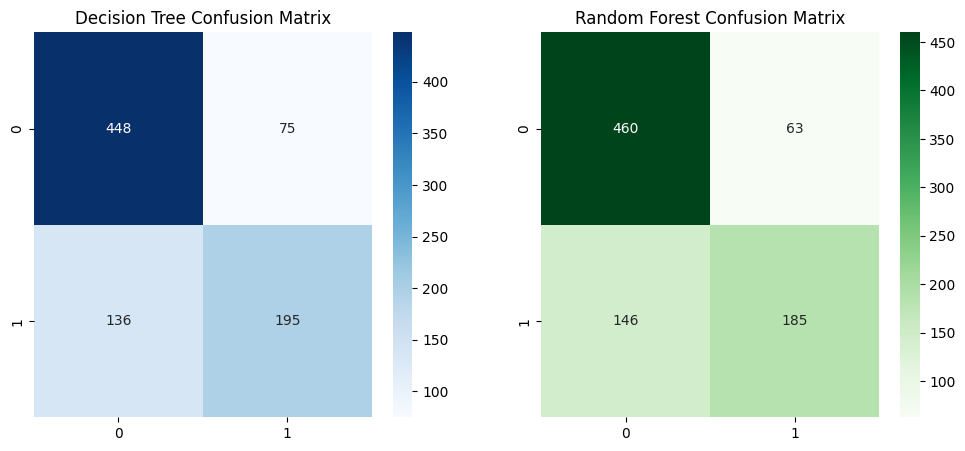

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification report
report_dt = classification_report(y_test, pred_dt)
report_rf = classification_report(y_test, pred_rf)
print("Classification report of Decision Tree : ")
print(report_dt)
print("Classification report of Random Forest : ")
print(report_rf)

# Confusion matrix
cm_dt = confusion_matrix(y_test, pred_dt)
cm_rf = confusion_matrix(y_test, pred_rf)

# Confusion Matrix Plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

# R^2 and RMSE - Calculation and Plotting

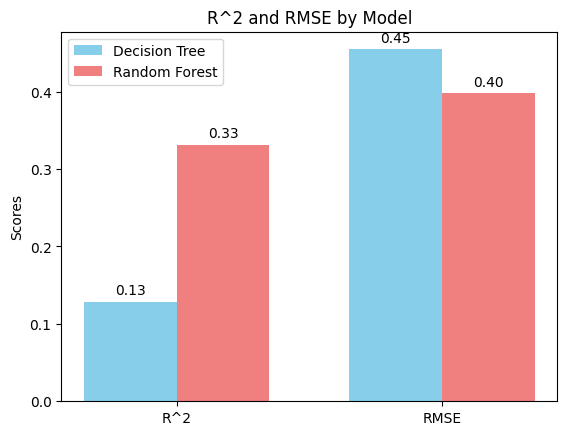

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

pred_prob_dt = model_dt.predict_proba(X_test)[:, 1]
pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
r2_dt = r2_score(y_test, pred_prob_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, pred_prob_dt))
r2_rf = r2_score(y_test, pred_prob_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_prob_rf))
# Plotting R^2 and RMSE
metrics = ['R^2', 'RMSE']
dt_scores = [r2_dt, rmse_dt]
rf_scores = [r2_rf, rmse_rf]


import numpy as np

metrics = ['R^2', 'RMSE']
dt_scores = [r2_dt, rmse_dt]
rf_scores = [r2_rf, rmse_rf]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree', color='skyblue')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightcoral')

ax.set_ylabel('Scores')
ax.set_title('R^2 and RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value annotations on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Results Summary Table

In [ ]:
results_summary = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'R^2': [r2_dt, r2_rf],
    'RMSE': [rmse_dt, rmse_rf]
}
results_df = pd.DataFrame(results_summary)
results_df

,Model,Accuracy,R^2,RMSE
0,Decision Tree,0.962529,0.839670,0.193574
1,Random Forest,0.970726,0.889556,0.160661


# **Logistic Regression Implementation**

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       523
           1       0.80      0.53      0.64       331

    accuracy                           0.77       854
   macro avg       0.78      0.73      0.74       854
weighted avg       0.77      0.77      0.76       854

Confusion Matrix for Logistic Regression:
 [[479  44]
 [154 177]]


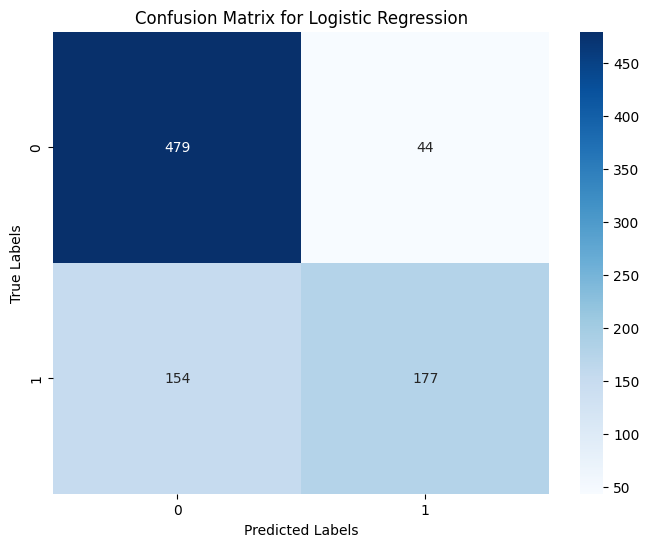

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_logreg))
confusion_matrix(y_test, y_pred_logreg)

# Obtain the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print or visualize the confusion matrix
print("Confusion Matrix for Logistic Regression:\n", cm_logreg)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **XGBoost Implementation**  (Extreme Gradient Boosting)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[16:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Results:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[529   7]
 [  9 309]]


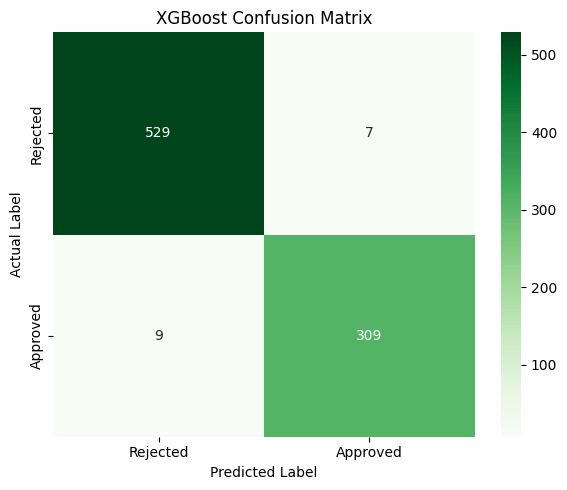

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# **ROC Curves** for all models  (Receiver Operating Characteristic)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:48:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




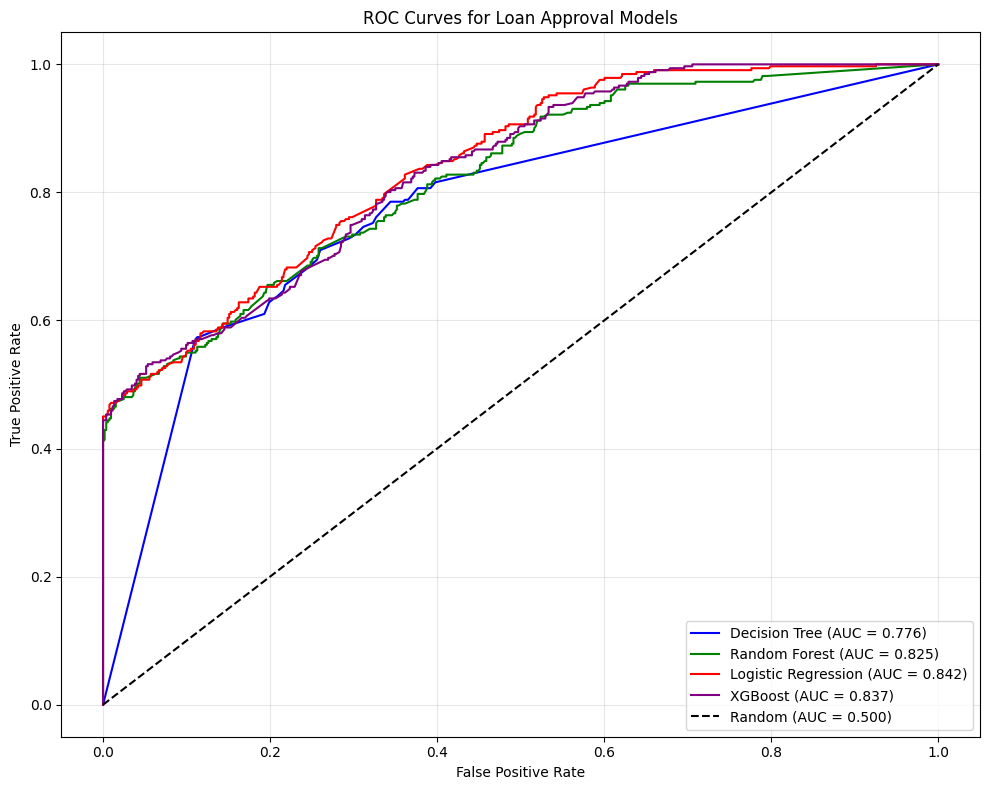

In [ ]:
# ROC curves for all models

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)  # X_train now has NLP features

# Now, predict using the retrained model
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)


# Calculate AUC scores
auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='green')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', color='red')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Loan Approval Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Models Comparision

                 Model  Accuracy       AUC      RMSE
0        Decision Tree  0.962529  0.958638  0.193574
1        Random Forest  0.970726  0.996351  0.160661
2  Logistic Regression  0.728337  0.801288  0.423031
3              XGBoost  0.981265  0.997900  0.108092


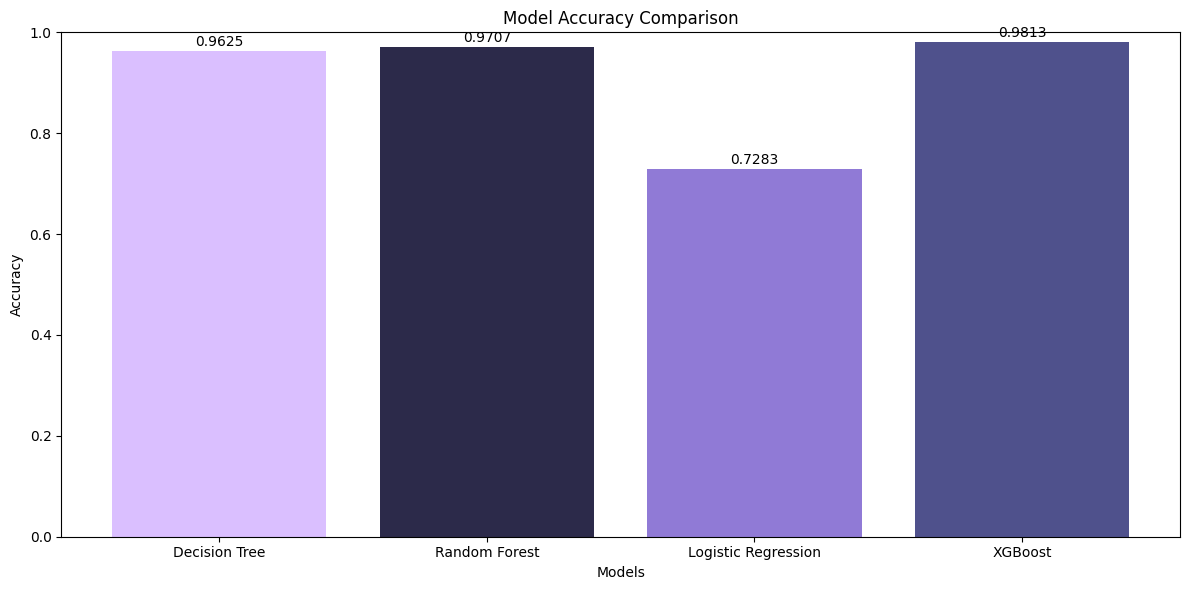

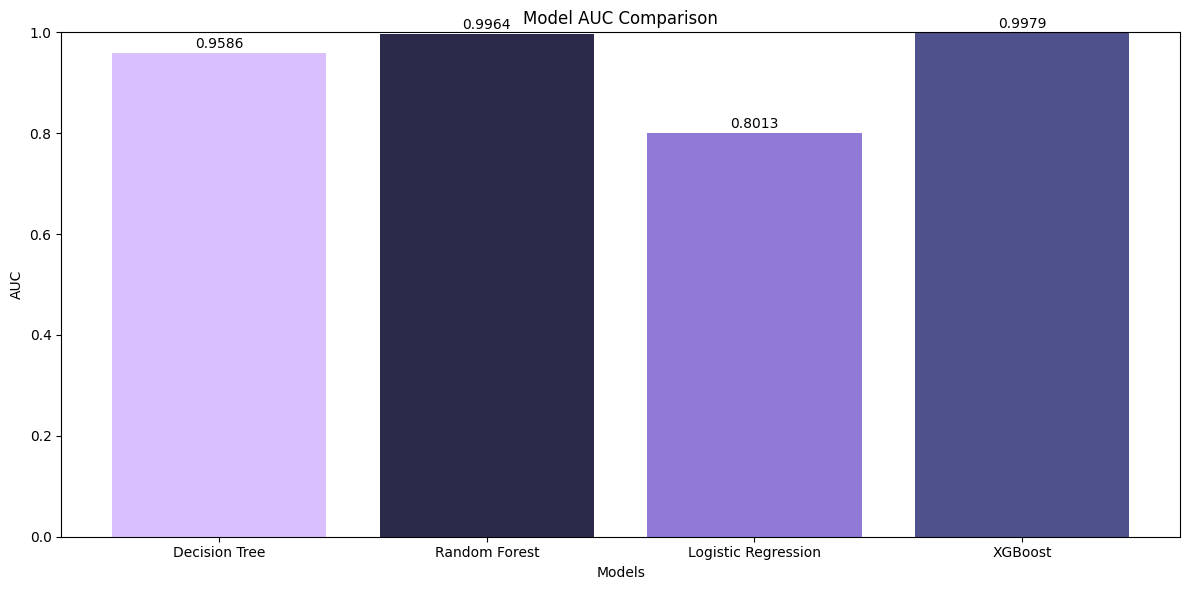

In [ ]:
# Model Comparison

# Calculate metrics for all models
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'XGBoost']
accuracy_scores = [
    accuracy_score(y_test, model_dt.predict(X_test)),
    accuracy_score(y_test, model_rf.predict(X_test)),
    accuracy_score(y_test, logreg_model.predict(X_test)),  # Use logreg_model to predict
    accuracy_score(y_test, y_pred_xgb)
]
auc_scores = [auc_dt, auc_rf, auc_lr, auc_xgb]

# Calculate RMSE for each model (using probabilities)
from sklearn.metrics import mean_squared_error
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, model_dt.predict_proba(X_test)[:, 1])),
    np.sqrt(mean_squared_error(y_test, model_rf.predict_proba(X_test)[:, 1])),
    np.sqrt(mean_squared_error(y_test, y_prob_lr)),
    np.sqrt(mean_squared_error(y_test, y_prob_xgb))
]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'AUC': auc_scores,
    'RMSE': rmse_scores
})

print(comparison_df)

# Bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_scores, color=['#dabfff', '#2c2a4a', '#907ad6', '#4f518c'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Bar plot for AUC comparison
plt.figure(figsize=(12, 6))
plt.bar(models, auc_scores, color=['#dabfff', '#2c2a4a', '#907ad6', '#4f518c'])
plt.title('Model AUC Comparison')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.ylim(0, 1.0)
for i, auc in enumerate(auc_scores):
    plt.text(i, auc + 0.01, f'{auc:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Feature Importances of Random Forest

<ipython-input-44-05f42e2cbbfb>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




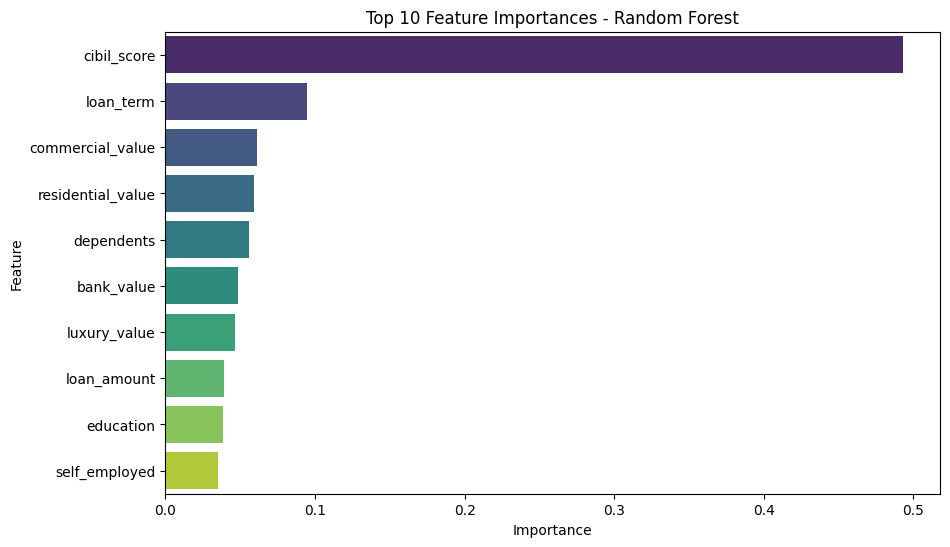

In [ ]:
import pandas as pd
import numpy as np
feature_names = df.drop(columns=['loan_id', 'loan_status', 'loan_status_label'], errors='ignore').columns
importances = model_rf.feature_importances_

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

# Create Text column from the dataset only since there are none

In [ ]:
def generate_text(row):
    return f"{row['education']} education, {'self-employed' if row['self_employed'] == 1 else 'not self-employed'}, " \
           f"income {row['income_annual']}, loan amount {row['loan_amount']}, cibil score {row['cibil_score']}"

df['profile_description'] = df.apply(generate_text, axis=1)

#Text - Vectorization (TF - IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['profile_description'])

# Combine with original numerical features

In [ ]:
from scipy.sparse import hstack

# Drop the columns used to form text so we don't duplicate features
X_numerical = df.drop(['loan_status_label', 'profile_description', 'education', 'self_employed'], axis=1)

# Combine TF-IDF text features with numerical features
X_combined = hstack([X_text, X_numerical.values])
y = df['loan_status_label']

# Splitting the dataset into Training and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

#**Modelling with NLP + Numerical Features**

# Decision Tree with NLP Features

In [ ]:
dt_model_nlp = DecisionTreeClassifier(random_state=42)
dt_model_nlp.fit(X_train, y_train)
y_pred_dt_nlp = dt_model_nlp.predict(X_test)
acc_dt_nlp = accuracy_score(y_test, y_pred_dt_nlp)
print("Decision Tree + NLP Accuracy:", acc_dt_nlp)

Decision Tree + NLP Accuracy: 0.9625292740046838


# Random Forest with NLP Features

In [ ]:
rf_model_nlp = RandomForestClassifier(random_state=42)
rf_model_nlp.fit(X_train, y_train)
y_pred_rf_nlp = rf_model_nlp.predict(X_test)
acc_rf_nlp = accuracy_score(y_test, y_pred_rf_nlp)
print("Random Forest + NLP Accuracy:", acc_rf_nlp)


Random Forest + NLP Accuracy: 0.9707259953161592


# Compare NLP vs Non - NLP

In [ ]:
print("Without NLP:")
print("  Decision Tree Accuracy:", accuracy_dt)
print("  Random Forest Accuracy:", accuracy_rf)

print("With NLP:")
print("  Decision Tree + NLP Accuracy:", acc_dt_nlp)
print("  Random Forest + NLP Accuracy:", acc_rf_nlp)


Without NLP:
  Decision Tree Accuracy: 0.752927400468384
  Random Forest Accuracy: 0.7552693208430913
With NLP:
  Decision Tree + NLP Accuracy: 0.9625292740046838
  Random Forest + NLP Accuracy: 0.9707259953161592
